# Credit Card Fraud Detection

## Import Packages

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing as pp
plt.style.use('ggplot')

## Load the Data

In [49]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
#Shows descriptive statistics about all the variables in the dataset 
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Check for Missing Values

In [51]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

All zeroes, so no missing values.

## Identify Fraudulent and Legitimate Transactions

In [52]:
#1 is fraud, 0 is legit
fraud = data.loc[data['Class'] == 1]
legit = data.loc[data['Class'] == 0]

In [53]:
#Number of fraudulent transactions
fraud.shape[0]

492

In [54]:
#Number of legitimate transactions
legit.shape[0]

284315

In [55]:
#Fraud rate
(fraud.shape[0]/data.shape[0]) * 100.

0.1727485630620034

Only .173% of the data is fraudulent, which means that the data is very imbalenced.

In [56]:
#Descriptive Statistics for fraudulent data
fraud.describe()[['Time','Amount']]

,Time,Amount
count,492.000000,492.000000
mean,80746.806911,122.211321
std,47835.365138,256.683288
min,406.000000,0.000000
25%,41241.500000,1.000000
50%,75568.500000,9.250000
75%,128483.000000,105.890000
max,170348.000000,2125.870000


In [57]:
#Descriptive Statistics for legitimate data
legit.describe()[['Time','Amount']]

,Time,Amount
count,284315.000000,284315.000000
mean,94838.202258,88.291022
std,47484.015786,250.105092
min,0.000000,0.000000
25%,54230.000000,5.650000
50%,84711.000000,22.000000
75%,139333.000000,77.050000
max,172792.000000,25691.160000


Fradulent transactions tend to be more than legitimate transactions.

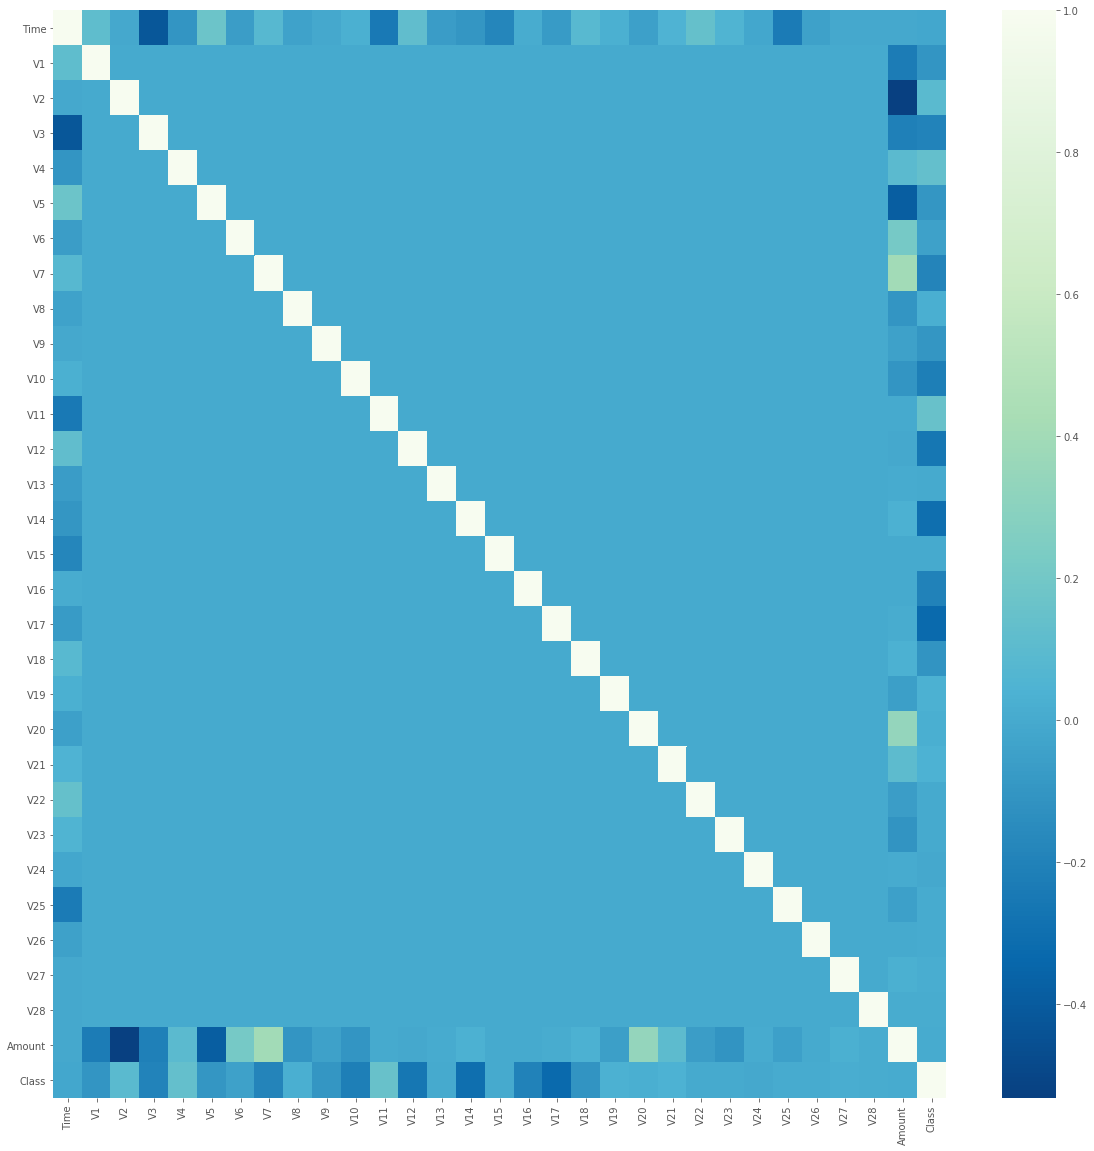

In [58]:
#Correlation matrix showing how correlated the different variables are
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(data.corr(), ax=ax, cmap = 'GnBu_r')

## Train - Test Split

In [59]:
#Establishing inputs and targets
X = data.iloc[:,0:-1]
X = X.to_numpy()

#Scaling the inputs
X_scaled = pp.scale(X)

y = data['Class']

In [60]:
#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .25)

## Dummy Classifier (Baseline)

In [61]:
#Fitting the model
dc = DummyClassifier()
dc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier()

In [62]:
#Storing the predicted values in y_pred_dummy
y_pred_dummy = dc.predict(X_test)

In [63]:
#Confusion Matrix
pd.crosstab(y_test, y_pred_dummy)

col_0,0,1
Class,,
0,70940,128
1,134,0


In [64]:
#Shows precision, recall, and f1-scores
print(classification_report(y_test,y_pred_dummy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71068
           1       0.00      0.00      0.00       134

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



## Logistic Regression Model

In [65]:
#Fitting the regression
lr = LogisticRegression(max_iter = 360)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=360)

In [66]:
#Storing the predicted values from the model in y_pred
y_pred = lr.predict(X_test)

In [67]:
#Confusion Matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,71054,14
1,61,73


In [68]:
#Prints precision, recall, f1-scores
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71068
           1       0.84      0.54      0.66       134

    accuracy                           1.00     71202
   macro avg       0.92      0.77      0.83     71202
weighted avg       1.00      1.00      1.00     71202



This model has a more accurate classification but a relatively low recall, meaning there are more people who get away with fraud. 

To get a more accurate result we can conduct oversampling or SMOTE (Synthetic Minority Oversampling Technique) to combat the imbalanced data.

## SMOTE 

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [70]:
#Creating new balanced training dataset 
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [71]:
from collections import Counter

In [72]:
print('Before SMOTE: ', Counter(y_train))
print('Before SMOTE: ', Counter(y_train_smote))

Before SMOTE:  Counter({0: 213247, 1: 358})
Before SMOTE:  Counter({0: 213247, 1: 213247})


Now we have an even distribution of fraud and legit transactions, we can proceed to model with the new data.

## Logistic Regression with SMOTE Training Data

In [73]:
#Fitting regression with new balanced data
lr_smote = LogisticRegression(max_iter = 200)
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=200)

In [74]:
#Predicted outputs for test dataset
y_pred_smote = lr_smote.predict(X_test)

In [75]:
#Confusion Matrix
pd.crosstab(y_test, y_pred_smote)

col_0,0,1
Class,,
0,69412,1656
1,15,119


In [76]:
#Prints precision, recall, f1-scores
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71068
           1       0.07      0.89      0.12       134

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



The logistic regression model is a great at detecting the class (high recall), but has very low precision.

## Naive Bayes with SMOTE Training Data

In [77]:
#Fitting model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)

GaussianNB()

In [78]:
#Predicted outputs for test inputs
y_pred_nb = nb.predict(X_test)

#Confusion Matrix
pd.crosstab(y_test, y_pred_nb)

col_0,0,1
Class,,
0,69464,1604
1,23,111


In [79]:
#Prints precision, recall, f1-scores
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71068
           1       0.06      0.83      0.12       134

    accuracy                           0.98     71202
   macro avg       0.53      0.90      0.55     71202
weighted avg       1.00      0.98      0.99     71202



Naive Bayes has a slightly lower precision and a lower recall than the logistic regression model, still probably not the best model.

## Random Forests with SMOTE training data

In [80]:
#Fitting the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini')
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [81]:
#Storing values predicted by the model in y_pred_rf
y_pred_rf = rf.predict(X_test)

#Confusion Matrix
pd.crosstab(y_test, y_pred_rf)

col_0,0,1
Class,,
0,71053,15
1,26,108


In [82]:
#Shows precision, recall, and f1-scores
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71068
           1       0.88      0.81      0.84       134

    accuracy                           1.00     71202
   macro avg       0.94      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202



Random Forest model has a relatively high F1 score with high recall and high precision. This is the best classification model for this dataset.

## Plotting ROC Curves

In [83]:
#Estimated Probabilities
dc_probs = dc.predict_proba(X_test)[:,1]
lr_probs = lr_smote.predict_proba(X_test)[:,1]
nb_probs = nb.predict_proba(X_test)[:,1]
rf_probs = rf.predict_proba(X_test)[:,1]

In [84]:
#AUROC for each method
dc_auc = roc_auc_score(y_test, dc_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [85]:
#Setting true/false positive rates
dc_fp, dc_tp,_ = roc_curve(y_test, dc_probs)
lr_fp, lr_tp,_ = roc_curve(y_test, lr_probs)
nb_fp, nb_tp,_ = roc_curve(y_test, nb_probs)
rf_fp, rf_tp,_ = roc_curve(y_test, rf_probs)

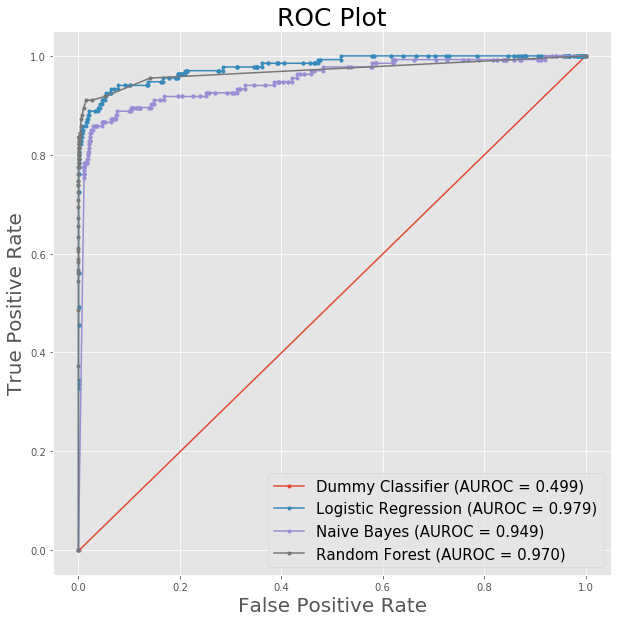

In [86]:
#Plotting Data
fig = plt.figure(figsize=(10,10))
plt.plot(dc_fp, dc_tp, marker='.', label='Dummy Classifier (AUROC = %0.3f)' % dc_auc)
plt.plot(lr_fp, lr_tp, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(nb_fp, nb_tp, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(rf_fp, rf_tp, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot', fontsize = 25)
# Axis labels
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
# Show legend
plt.legend(fontsize = 15)
# Show plot
plt.show()